# HW8

    Name: Trisha Mandal            Github username: trish11953             USC ID:1449602587

In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score, f1_score, precision_score, auc
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, accuracy_score
from sklearn import preprocessing
from sklearn.svm import LinearSVC
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from scipy.stats import mode
from sklearn.cluster import SpectralClustering
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

# 1. Supervised, Semi-Supervised, and Unsupervised Learning

(a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set

In [2]:
df = pd.read_csv('../data/wdbc.data', header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
df.replace({'B' : 0, 'M' : 1}, inplace = True)
df.drop(0, axis=1, inplace=True)
df.rename(columns={1: 'class'}, inplace=True)
df

,class,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
xdata, ydata = df.iloc[:, 1:], df.iloc[:, 0]
norm = preprocessing.normalize(xdata)
normalizedxdata = pd.DataFrame(norm)
df = pd.concat([ydata, normalizedxdata], axis = 1)
df

,class,0,1,2,3,4,5,6,7,8,...,20,21,22,23,24,25,26,27,28,29
0,1,0.007925,0.004573,0.054099,0.440986,0.000052,0.000122,0.000132,0.000065,0.000107,...,0.011181,0.007635,0.081325,0.889462,0.000071,0.000293,0.000314,0.000117,0.000203,0.000052
1,1,0.008666,0.007486,0.055988,0.558619,0.000036,0.000033,0.000037,0.000030,0.000076,...,0.010528,0.009862,0.066899,0.824026,0.000052,0.000079,0.000102,0.000078,0.000116,0.000038
2,1,0.009367,0.010109,0.061842,0.572276,0.000052,0.000076,0.000094,0.000061,0.000098,...,0.011212,0.012145,0.072545,0.812984,0.000069,0.000202,0.000214,0.000116,0.000172,0.000042
3,1,0.016325,0.029133,0.110899,0.551922,0.000204,0.000406,0.000345,0.000150,0.000371,...,0.021314,0.037881,0.141333,0.811515,0.000300,0.001238,0.000982,0.000368,0.000949,0.000247
4,1,0.009883,0.006985,0.065808,0.631774,0.000049,0.000065,0.000096,0.000051,0.000088,...,0.010979,0.008120,0.074137,0.767189,0.000067,0.000100,0.000195,0.000079,0.000115,0.000037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,0.008541,0.008870,0.056256,0.585933,0.000044,0.000046,0.000097,0.000055,0.000068,...,0.010082,0.010459,0.065804,0.803033,0.000056,0.000084,0.000163,0.000088,0.000082,0.000028
565,1,0.009344,0.013114,0.060903,0.585355,0.000045,0.000048,0.000067,0.000045,0.000081,...,0.010997,0.017756,0.071951,0.803528,0.000054,0.000089,0.000149,0.000076,0.000119,0.000031
566,1,0.011644,0.019696,0.075966,0.601905,0.000059,0.000072,0.000065,0.000037,0.000112,...,0.013313,0.023933,0.088872,0.788417,0.000080,0.000217,0.000239,0.000099,0.000156,0.000055
567,1,0.009230,0.013142,0.062774,0.566806,0.000053,0.000124,0.000157,0.000068,0.000107,...,0.011533,0.017663,0.082713,0.815932,0.000074,0.000389,0.000421,0.000119,0.000183,0.000056


(b) Monte-Carlo Simulation: Repeat the following procedures for supervised, un- supervised, and semi-supervised learning M = 30 times, and use randomly se- lected train and test data (make sure you use 20% of both the positve and nega- tive classes as the test set). Then compare the average scores (accuracy, precision, recall, F1-score, and AUC) that you obtain from each algorithm.


i. Supervised Learning: Train an L1-penalized SVM to classify the data. Use 5 fold cross validation to choose the penalty parameter. Use normalized data. Report the average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.


In [5]:
negative, positive = [], []
for i in range(len(df)):
    if df['class'][i] == 0:
        negative.append(df.iloc[i,:])
    if df['class'][i] == 1:
        positive.append(df.iloc[i,:])
negdata, posdata = pd.DataFrame(negative), pd.DataFrame(positive)
posdata

,class,0,1,2,3,4,5,6,7,8,...,20,21,22,23,24,25,26,27,28,29
0,1.0,0.007925,0.004573,0.054099,0.440986,0.000052,0.000122,0.000132,0.000065,0.000107,...,0.011181,0.007635,0.081325,0.889462,0.000071,0.000293,0.000314,0.000117,0.000203,0.000052
1,1.0,0.008666,0.007486,0.055988,0.558619,0.000036,0.000033,0.000037,0.000030,0.000076,...,0.010528,0.009862,0.066899,0.824026,0.000052,0.000079,0.000102,0.000078,0.000116,0.000038
2,1.0,0.009367,0.010109,0.061842,0.572276,0.000052,0.000076,0.000094,0.000061,0.000098,...,0.011212,0.012145,0.072545,0.812984,0.000069,0.000202,0.000214,0.000116,0.000172,0.000042
3,1.0,0.016325,0.029133,0.110899,0.551922,0.000204,0.000406,0.000345,0.000150,0.000371,...,0.021314,0.037881,0.141333,0.811515,0.000300,0.001238,0.000982,0.000368,0.000949,0.000247
4,1.0,0.009883,0.006985,0.065808,0.631774,0.000049,0.000065,0.000096,0.000051,0.000088,...,0.010979,0.008120,0.074137,0.767189,0.000067,0.000100,0.000195,0.000079,0.000115,0.000037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,1.0,0.009181,0.011011,0.062755,0.591130,0.000048,0.000098,0.000139,0.000065,0.000094,...,0.010660,0.012907,0.078598,0.798267,0.000062,0.000184,0.000290,0.000112,0.000129,0.000043
564,1.0,0.008541,0.008870,0.056256,0.585933,0.000044,0.000046,0.000097,0.000055,0.000068,...,0.010082,0.010459,0.065804,0.803033,0.000056,0.000084,0.000163,0.000088,0.000082,0.000028
565,1.0,0.009344,0.013114,0.060903,0.585355,0.000045,0.000048,0.000067,0.000045,0.000081,...,0.010997,0.017756,0.071951,0.803528,0.000054,0.000089,0.000149,0.000076,0.000119,0.000031
566,1.0,0.011644,0.019696,0.075966,0.601905,0.000059,0.000072,0.000065,0.000037,0.000112,...,0.013313,0.023933,0.088872,0.788417,0.000080,0.000217,0.000239,0.000099,0.000156,0.000055


In [6]:
# reference: https://scikit-learn.org/stable/glossary.html#term-decision_function
def roc(clr, xtest, ytest):
    predictionprobabity = clr.decision_function(xtest)
    falsepositiverate, truepositiverate, threshold = roc_curve(ytest, predictionprobabity)
    plt.plot(falsepositiverate, truepositiverate)
    plt.plot([0, 1], [0, 1], 'k--',color="darkorange",)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title("ROC Curve")
    plt.show()
    print("AUC score is:", roc_auc_score(ytest, predictionprobabity))

In [7]:
def allmetrics (xdata, ydata, l1mod, penalty, accuracy, recall, f1score , aucscore, precision): 
    bestparams = l1mod.best_params_['C']
    prediction = l1mod.predict(xdata)
    predictionprobabity = l1mod.decision_function(xdata)
    penalty.append(bestparams)
    acc = accuracy_score(ydata, prediction)
    accuracy.append(acc)
    rec = recall_score(ydata, prediction)
    recall.append(rec)
    prec = precision_score(ydata, prediction)
    precision.append(prec)
    f1 = f1_score(ydata, prediction)
    f1score.append(f1)
    roc = roc_auc_score(ydata, predictionprobabity)
    aucscore.append(roc)
    return penalty, accuracy, recall, f1score, aucscore, precision

In [8]:
l1mod = LinearSVC(penalty = 'l1', dual = False, random_state = 0, tol = 1e-3)
param_grid = {'C':np.logspace(-1, 10, 10)}
gridcv = GridSearchCV(l1mod, param_grid, cv = StratifiedKFold(5, shuffle = True))

In [9]:
trainpenalty, testpenalty, trainaccuracy, testaccuracy, trainrecall, testrecall = [],[],[],[],[],[]
trainf1score, testf1score, trainaucscore, testaucscore, trainprecision, testprecision = [],[],[],[],[],[]

for i in range(30):
    postrain , postest = train_test_split(posdata, test_size = 0.2, random_state=42)
    negtrain, negtest = train_test_split(negdata, test_size = 0.2, random_state=42)
    trainingset,  testingset = pd.concat([postrain, negtrain]), pd.concat([postest, negtest])
    xtrain, ytrain, xtest, ytest = trainingset.iloc[:, 1:], trainingset.iloc[:, 0], testingset.iloc[:, 1:], testingset.iloc[:, 0]
    clr = gridcv.fit(xtrain, ytrain)
    trainpenalty, trainaccuracy, trainrecall, trainf1score, trainaucscore, trainprecision = allmetrics(xtrain, ytrain, clr, trainpenalty, trainaccuracy, trainrecall, trainf1score, trainaucscore, trainprecision)
    testpenalty, testaccuracy, testrecall, testf1score, testaucscore, testprecision = allmetrics(xtest, ytest, clr, testpenalty, testaccuracy, testrecall, testf1score, testaucscore, testprecision)

In [10]:
avgpenalty = np.mean(trainpenalty)
avgaccuracy = np.mean(trainaccuracy)
avgrecall = np.mean(trainrecall)
avgf1score = np.mean(trainf1score)
avgaucscore = np.mean(trainaucscore)
avgprecision = np.mean(trainprecision)

print('Average Best SVM Penalty "C" for Training Set:',avgpenalty )
print('Average Accuracy for Training Set:', avgaccuracy)
print('Average Recall for Training Set:', avgrecall )
print('Average F1 score for Training Set:',avgf1score)
print('Average AUC score for Training Set:', avgaucscore)
print('Average Precision for Training Set:', avgprecision)

Average Best SVM Penalty "C" for Training Set: 1583197.218082642
Average Accuracy for Training Set: 0.9834067547723938
Average Recall for Training Set: 0.9753451676528598
Average F1 score for Training Set: 0.9776638959331265
Average AUC score for Training Set: 0.9986234817813765
Average Precision for Training Set: 0.9800103934143547


In [11]:
clr = gridcv.fit(xtrain, ytrain)
yprediction = clr.predict(xtrain)
tn, fp, fn, tp = confusion_matrix(ytrain,yprediction).ravel()
ct = pd.DataFrame(confusion_matrix(ytrain, yprediction), columns=['Predicted False', "Predicted True"], index=['Actual False', 'Actual True'])
print("For Training data")
ct

For Training data


,Predicted False,Predicted True
Actual False,281,4
Actual True,4,165


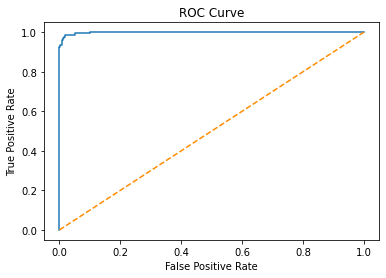

AUC score is: 0.9984636146579466


In [12]:
roc(clr, xtrain, ytrain)

In [13]:
avgpenalty = np.mean(testpenalty)
avgaccuracy = np.mean(testaccuracy)
avgrecall = np.mean(testrecall)
avgf1score = np.mean(testf1score)
avgaucscore = np.mean(testaucscore)
avgprecision = np.mean(testprecision)

print('Average Best SVM Penalty "C" for Testing Set:',avgpenalty )
print('Average Accuracy for Testing Set:', avgaccuracy)
print('Average Recall for Testing Set:', avgrecall )
print('Average F1 score for Testing Set:',avgf1score)
print('Average AUC score for Testing Set:', avgaucscore)
print('Average Precision for Testing Set:', avgprecision)

Average Best SVM Penalty "C" for Testing Set: 1583197.218082642
Average Accuracy for Testing Set: 0.96231884057971
Average Recall for Testing Set: 0.9759689922480618
Average F1 score for Testing Set: 0.9509525971323722
Average AUC score for Testing Set: 0.9971468561584842
Average Precision for Testing Set: 0.9272422653921265


In [14]:
clr = gridcv.fit(xtest, ytest)
yprediction = clr.predict(xtest)
tn, fp, fn, tp = confusion_matrix(ytest,yprediction).ravel()
ct = pd.DataFrame(confusion_matrix(ytest, yprediction), columns=['Predicted False', "Predicted True"], index=['Actual False', 'Actual True'])
print("For Training data")
ct

For Training data


,Predicted False,Predicted True
Actual False,72,0
Actual True,1,42


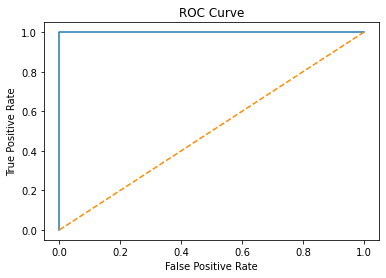

AUC score is: 1.0


In [15]:
roc(clr, xtest, ytest)

ii. Semi-Supervised Learning/ Self-training: select 50% of the positive class along with 50% of the negative class in the training set as labeled data and the rest as unlabelled data. You can select them randomly.

A. Train an L1-penalized SVM to classify the labeled data Use normalized data. Choose the penalty parameter using 5 fold cross validation.

B. Find the unlabeled data point that is the farthest to the decision boundary of the SVM. Let the SVM label it (ignore its true label), and add it to the labeled data, and retrain the SVM. Continue this process until all unlabeled data are used. Test the final SVM on the test data andthe average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

In [16]:
l1mod = LinearSVC(penalty = 'l1', dual = False, random_state = 0, tol = 1e-3)
param_grid = {'C':np.logspace(-1, 10, 10)}
gridcv = GridSearchCV(l1mod, param_grid, cv = StratifiedKFold(5, shuffle = True))

In [23]:
# references: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# https://stats.stackexchange.com/questions/167682/getting-distance-of-points-from-decision-boundary-with-linear-svm
trainpenalty, testpenalty, trainaccuracy, testaccuracy, trainrecall, testrecall = [],[],[],[],[],[]
trainf1score, testf1score, trainaucscore, testaucscore, trainprecision, testprecision = [],[],[],[],[],[]

for i in range(30):
    postrain , postest = train_test_split(posdata, test_size = 0.2, shuffle=True)
    negtrain, negtest = train_test_split(negdata, test_size = 0.2, shuffle=True)
    trainingset, testingset = pd.concat([postrain, negtrain]), pd.concat([postest, negtest])
    labelednegdata, unlabelednegdata = train_test_split(negtrain, train_size=0.5)
    labeledposdata, unlabeledposdata = train_test_split(postrain, train_size=0.5)
    labeled = pd.concat([labelednegdata, labeledposdata]) 
    unlabeled = pd.concat([unlabelednegdata, unlabeledposdata]) 
    xlabeled, ylabeled, xunlabeled, yunlabeled  = labeled.iloc[:, 1:], labeled.iloc[:, 0], unlabeled.iloc[:, 1:], unlabeled.iloc[:, 0]
    clr = gridcv.fit(xlabeled, ylabeled)
    size = len(xunlabeled)
    while size >= 1:
        distances = clr.decision_function(xunlabeled)
        sorteddist = sorted([a for a in range(len(xunlabeled))], key = lambda x : abs(distances[x]), reverse = True)
        farthestx, farthesty = pd.DataFrame(xunlabeled.iloc[sorteddist[0],:]), pd.Series(yunlabeled.iloc[sorteddist[0]])
        xlabeled, ylabeled = pd.concat([xlabeled, farthestx.T]), pd.concat([ylabeled, farthesty])
        drop = xunlabeled.index[sorteddist[0]]
        xunlabeled = xunlabeled.drop(index = drop)
        clr = clr.fit(xlabeled, ylabeled)
        size=size -1
        
    trainpenalty, trainaccuracy, trainrecall, trainf1score, trainaucscore, trainprecision = allmetrics(xtrain, ytrain, clr, trainpenalty, trainaccuracy, trainrecall, trainf1score, trainaucscore, trainprecision)
    testpenalty, testaccuracy, testrecall, testf1score, testaucscore, testprecision = allmetrics(xtest, ytest, clr, testpenalty, testaccuracy, testrecall, testf1score, testaucscore, testprecision)

In [24]:
avgpenalty = np.mean(trainpenalty)
avgaccuracy = np.mean(trainaccuracy)
avgrecall = np.mean(trainrecall)
avgf1score = np.mean(trainf1score)
avgaucscore = np.mean(trainaucscore)
avgprecision = np.mean(trainprecision)

print('Average Best SVM Penalty "C" for Training Set:',avgpenalty )
print('Average Accuracy for Training Set:', avgaccuracy)
print('Average Recall for Training Set:', avgrecall )
print('Average F1 score for Training Set:',avgf1score)
print('Average AUC score for Training Set:', avgaucscore)
print('Average Precision for Training Set:', avgprecision)

Average Best SVM Penalty "C" for Training Set: 230461.28551470346
Average Accuracy for Training Set: 0.7679148311306905
Average Recall for Training Set: 0.376923076923077
Average F1 score for Training Set: 0.5192002653721555
Average AUC score for Training Set: 0.9657635212291082
Average Precision for Training Set: 0.8658791563046883


In [30]:
yprediction = clr.predict(xtrain)
tn, fp, fn, tp = confusion_matrix(ytrain,yprediction).ravel()
ct = pd.DataFrame(confusion_matrix(ytrain, yprediction), columns=['Predicted False', "Predicted True"], index=['Actual False', 'Actual True'])
print("For Training data")
ct

For Training data


,Predicted False,Predicted True
Actual False,278,7
Actual True,15,154


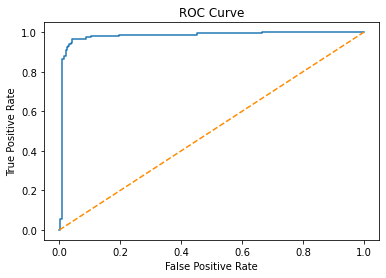

AUC score is: 0.9819993771410775


In [31]:
roc(clr, xtrain, ytrain)

In [27]:
avgpenalty = np.mean(testpenalty)
avgaccuracy = np.mean(testaccuracy)
avgrecall = np.mean(testrecall)
avgf1score = np.mean(testf1score)
avgaucscore = np.mean(testaucscore)
avgprecision = np.mean(testprecision)

print('Average Best SVM Penalty "C" for Testing Set:',avgpenalty )
print('Average Accuracy for Testing Set:', avgaccuracy)
print('Average Recall for Testing Set:', avgrecall )
print('Average F1 score for Testing Set:',avgf1score)
print('Average AUC score for Testing Set:', avgaucscore)
print('Average Precision for Testing Set:', avgprecision)

Average Best SVM Penalty "C" for Testing Set: 230461.28551470346
Average Accuracy for Testing Set: 0.8000000000000002
Average Recall for Testing Set: 0.4651162790697674
Average F1 score for Testing Set: 0.5988126630326265
Average AUC score for Testing Set: 0.9786175710594315
Average Precision for Testing Set: 0.8666666666666667


In [32]:
yprediction = clr.predict(xtest)
tn, fp, fn, tp = confusion_matrix(ytest,yprediction).ravel()
ct = pd.DataFrame(confusion_matrix(ytest, yprediction), columns=['Predicted False', "Predicted True"], index=['Actual False', 'Actual True'])
print("For Training data")
ct

For Training data


,Predicted False,Predicted True
Actual False,72,0
Actual True,0,43


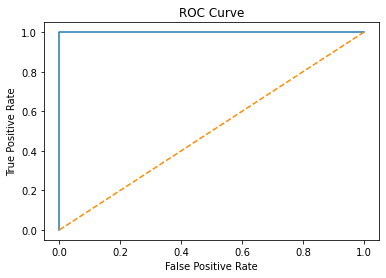

AUC score is: 1.0


In [33]:
roc(clr, xtest, ytest)

iii. Unsupervised Learning: Run k-means algorithm on the whole training set. Ignore the labels of the data, and assume k = 2.

A. Run the k-means algorithm multiple times. Make sure that you initialize the algoritm randomly. How do you make sure that the algorithm was not trapped in a local minimum?

reference: https://stackoverflow.com/questions/43789602/avoiding-local-minima-when-using-kmeans

There is no way to completely avoid local minima but there are ways to lower the chances of coming across one. This can be done by running the clustering algorithm multiple times and using some sort of output function which can give you the best solution. You can also use a better initialization function that can give a better sum of squares distance. 

In [42]:
# reference: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

kmeansmod = KMeans(n_clusters = 2, init = 'random', n_init =  100, random_state = 1)

B. Compute the centers of the two clusters and find the closest 30 data points to each center. Read the true labels of those 30 data points and take a majority poll within them. The majority poll becomes the label predicted by k-means for the members of each cluster. Then compare the labels provided by k-means with the true labels of the training data and report the average accuracy, precision, recall, F1-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs.


In [84]:
#reference: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html
def kmeansallmetrics(xdata, ydata, km, accuracy, recall, f1score , aucscore, precision, pred): 
    prediction = km.predict(xdata)
    acc = accuracy_score(ydata, prediction)
    accuracy.append(acc)
    rec = recall_score(ydata, prediction)
    recall.append(rec)
    prec = precision_score(ydata, prediction)
    precision.append(prec)
    f1 = f1_score(ydata, prediction)
    f1score.append(f1)
    fpr, tpr, thresholds = roc_curve(ydata, pred)
    roc = auc(fpr, tpr)
    aucscore.append(roc)
    return accuracy, recall, f1score, aucscore, precision

def roc(clr, xtest, ytest, pred):
    falsepositiverate, truepositiverate, threshold = roc_curve(ytest, pred)
    plt.plot(falsepositiverate, truepositiverate)
    plt.plot([0, 1], [0, 1], 'k--',color="darkorange",)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title("ROC Curve")
    plt.show()
    print("AUC score is:", auc(falsepositiverate, truepositiverate))

In [85]:
# reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html
trainaccuracy, testaccuracy, trainrecall, testrecall = [],[],[],[]
trainf1score, testf1score, trainaucscore, testaucscore, trainprecision, testprecision = [],[],[],[],[],[]

for m in range(30):
    xtrain, xtest, ytrain, ytest= train_test_split(xdata, ydata, test_size=0.2, random_state=0, stratify=ydata)
    kmeansmod = KMeans(n_clusters = 2, init = 'random', n_init =  100, random_state = m)
    kmeansmod = kmeansmod.fit(xtrain)
    centers = kmeansmod.cluster_centers_
    xtraintruelabels = list(kmeansmod.labels_)
    dist = cdist(xtrain, centers, 'euclidean')
    dist2 = cdist(xtest, centers, 'euclidean')
    labels0, labels1, predytrain, predytest, clusterlabel0, clusterlabel1 = [], [], [], [], 0, 0

    cluster0 = [d[0] for d in dist]
    cluster1 = [d[1] for d in dist]
    l1, l2 = len(cluster0), len(cluster1)
    index0, index1 = sorted(range(l1), key=lambda k: cluster0[k])[:30], sorted(range(l2), key=lambda k: cluster1[k])[:30]

    lst = ytrain.tolist()
    for ind in range(0,30):
        curr0, curr1 = index0[ind], index1[ind]
        labels0.append(lst[curr0])
        labels1.append(lst[curr1])    

    ones, zeros = labels0.count(1), labels0.count(0)
    if ones >= zeros:
        clusterlabel0 = 1

    ones2, zeros2 = labels1.count(1), labels1.count(0)
    if ones2 >= zeros2:
        clusterlabel1 = 1

    for l in xtraintruelabels:
        if l==0:
            predytrain.append(clusterlabel0)
        if l!=0:
            predytrain.append(clusterlabel1)

    for d in dist2:
        if d[0] < d[1]:
            predytest.append(clusterlabel0)
        if d[0] >= d[1]:
            predytest.append(clusterlabel1)
        
trainaccuracy, trainrecall, trainf1score, trainaucscore, trainprecision = kmeansallmetrics(xtrain, ytrain, kmeansmod, trainaccuracy, trainrecall, trainf1score, trainaucscore, trainprecision, predytrain)
testaccuracy, testrecall, testf1score, testaucscore, testprecision = kmeansallmetrics(xtest, ytest, kmeansmod, testaccuracy, testrecall, testf1score, testaucscore, testprecision,predytest )
tn, fp, fn, tp = confusion_matrix(ytrain, predytrain).ravel()
ct = pd.DataFrame(confusion_matrix(ytrain, predytrain), columns=['Predicted False', "Predicted True"], index=['Actual False', 'Actual True'])
print("For Training data")
ct     

For Training data


,Predicted False,Predicted True
Actual False,284,1
Actual True,69,101


In [86]:
avgaccuracy = np.mean(trainaccuracy)
avgrecall = np.mean(trainrecall)
avgf1score = np.mean(trainf1score)
avgaucscore = np.mean(trainaucscore)
avgprecision = np.mean(trainprecision)

print("For Kmeans clustering")
print('Average Accuracy for Training Set:', avgaccuracy)
print('Average Recall for Training Set:', avgrecall )
print('Average F1 score for Training Set:',avgf1score)
print('Average AUC score for Training Set:', avgaucscore)
print('Average Precision for Training Set:', avgprecision)

For Kmeans clustering
Average Accuracy for Training Set: 0.8461538461538461
Average Recall for Training Set: 0.5941176470588235
Average F1 score for Training Set: 0.7426470588235294
Average AUC score for Training Set: 0.7953044375644995
Average Precision for Training Set: 0.9901960784313726


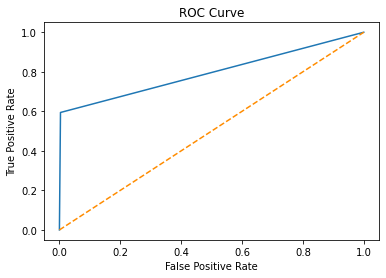

AUC score is: 0.7953044375644995


In [88]:
roc(kmeansmod, xtrain, ytrain, predytrain)

C. Classify test data based on their proximity to the centers of the clusters. Report the average accuracy, precision, recall, F1-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs for the test data.2

In [89]:
tn, fp, fn, tp = confusion_matrix(ytest, predytest).ravel()
ct = pd.DataFrame(confusion_matrix(ytest, predytest), columns=['Predicted False', "Predicted True"], index=['Actual False', 'Actual True'])
print("For Training data")
ct   

For Training data


,Predicted False,Predicted True
Actual False,72,0
Actual True,13,29


In [90]:
avgaccuracy = np.mean(testaccuracy)
avgrecall = np.mean(testrecall)
avgf1score = np.mean(testf1score)
avgaucscore = np.mean(testaucscore)
avgprecision = np.mean(testprecision)

print("For Kmeans clustering")
print('Average Accuracy for Testing Set:', avgaccuracy)
print('Average Recall for Testing Set:', avgrecall )
print('Average F1 score for Testing Set:',avgf1score)
print('Average AUC score for Testing Set:', avgaucscore)
print('Average Precision for Testing Set:', avgprecision)

For Kmeans clustering
Average Accuracy for Testing Set: 0.8859649122807017
Average Recall for Testing Set: 0.6904761904761905
Average F1 score for Testing Set: 0.8169014084507042
Average AUC score for Testing Set: 0.8452380952380952
Average Precision for Testing Set: 1.0


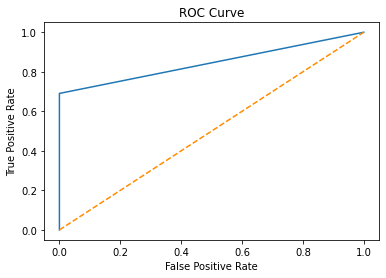

AUC score is: 0.8452380952380952


In [91]:
roc(kmeansmod, xtest, ytest, predytest)

iv. Spectral Clustering: Repeat 1(b)iii using spectral clustering, which is clustering based on kernels. Research what spectral clustering is. Use RBF kernel with gamma=1 or find a gamma for which the two clutsres have the same balance as the one in original data set (if the positive class has p and the negative class has n samples, the two clusters must have p and n members). Do not label data based on their proximity to cluster center, because spectral clustering may give you non-convex clusters . Instead, use fit − predict method.

In [103]:
def spectralallmetrics(xdata, ydata, smod, accuracy, recall, f1score , aucscore, precision, pred): 
    prediction = smod.fit_predict(xdata)
    acc = accuracy_score(ydata, prediction.round())
    accuracy.append(acc)
    rec = recall_score(ydata, prediction)
    recall.append(rec)
    prec = precision_score(ydata, prediction)
    precision.append(prec)
    f1 = f1_score(ydata, prediction)
    f1score.append(f1)
    fpr, tpr, thresholds = roc_curve(ydata, pred)
    roc = auc(fpr, tpr)
    aucscore.append(roc)
    return accuracy, recall, f1score, aucscore, precision

def spectralroc(clr, xtest, ytest, pred):
    falsepositiverate, truepositiverate, threshold = roc_curve(ytest, pred)
    plt.plot(falsepositiverate, truepositiverate)
    plt.plot([0, 1], [0, 1], 'k--',color="darkorange",)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title("ROC Curve")
    plt.show()
    print("AUC score is:", auc(falsepositiverate, truepositiverate))

v. One can expect that supervised learning on the full data set works better than semi-supervised learning with half of the data set labeled.One can expect that unsupervised learning underperforms in such situations. Compare the results you obtained by those methods.

From the results from part i) ii) iii) iv) we can say that Supervised Learning performs best followed by Semi-Supervised Learning, Spectral Clustering and then Unsupervised learning. 

# 2. Active Learning Using Support Vector Machines

(a) Download the banknote authentication Data Set. Choose 472 data points ran- domly as the test set, and the remaining 900 points as the training set. This is a binary classification problem.

In [143]:
dat = pd.read_table('../data/data_banknote_authentication.txt', sep=',', header = None)
dat

,0,1,2,3,4
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


(b) Repeat each of the following two procedures 50 times. You will have 50 errors for 90 SVMs per each procedure.

i. Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the penalty parameter using 5-fold cross validation.4 Repeat this process by adding 10 other randomly selected data points to the pool, until you use all the 900 points. Do NOT replace the samples back into the training set at each step. Calculate the test error for each SVM. You will have 90 SVMs that were trained using 10, 20, 30, ... , 900 data points and their 90 test errors. You have implemented passive learning.

In [161]:
l1mod = LinearSVC(penalty = 'l1', dual = False, random_state = 0, tol = 1e-3)
param_grid = {'C':np.logspace(-1, 10, 10)}
gridcv = GridSearchCV(l1mod, param_grid, cv = StratifiedKFold(5, shuffle = True))

In [224]:
passivelearning = {}
for i in range(50):
    trainset, testset = train_test_split(dat, train_size = 900, random_state = i)
    xtrain, ytrain, x, y = pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
    testingerrors = []
    for j in range(90):
        temp = trainset.head(10)
        trainset = trainset.drop(index = temp.index)
        x, y= temp.iloc[:, :4], temp.iloc[:, 4]
        xtrain, ytrain = pd.concat([xtrain, x]), pd.concat([ytrain, y])
        l1mod = l1mod.fit(xtrain, ytrain.values.ravel())
        pred = l1mod.predict(xtrain)
        acc = accuracy_score(ytrain, pred)
        testingerrors.append(1 - acc)
    passivelearning[i] = testingerrors

In [225]:
passivelearning

{0: [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.01666666666666672,
  0.014285714285714235,
  0.012499999999999956,
  0.011111111111111072,
  0.010000000000000009,
  0.018181818181818188,
  0.01666666666666672,
  0.01538461538461533,
  0.0071428571428571175,
  0.00666666666666671,
  0.012499999999999956,
  0.0117647058823529,
  0.011111111111111072,
  0.010526315789473717,
  0.010000000000000009,
  0.00952380952380949,
  0.009090909090909038,
  0.008695652173912993,
  0.008333333333333304,
  0.008000000000000007,
  0.007692307692307665,
  0.007407407407407418,
  0.0071428571428571175,
  0.006896551724137945,
  0.010000000000000009,
  0.009677419354838679,
  0.012499999999999956,
  0.018181818181818188,
  0.01764705882352946,
  0.017142857142857126,
  0.01666666666666672,
  0.013513513513513487,
  0.013157894736842146,
  0.01538461538461533,
  0.015000000000000013,
  0.014634146341463428,
  0.014285714285714235,
  0.013953488372092981,
  0.013636363636363669,
  0.01777777777777778,
  0.0152173

Monte carlo simulation was done 50 times and 90 SVMs were created giving 90 test errors for each.

ii) Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the parameters of the SVM with 5-fold cross validation. Choose the 10 closest data points in the training set to the hyperplane of the SVM6 and add them to the pool. Do not replace the samples back into the training set. Train a new SVM using the pool. Repeat this process until all training data is used. You will have 90 SVMs that were trained using 10, 20, 30,..., 900 data points and their 90 test errors. You have implemented active learning.

# References

https://scikit-learn.org/stable/glossary.html#term-decision_function

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

https://stats.stackexchange.com/questions/167682/getting-distance-of-points-from-decision-boundary-with-linear-svm

https://stackoverflow.com/questions/43789602/avoiding-local-minima-when-using-kmeans

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html